# Working Memory Decay Analysis

This notebook analyzes the decay of working memory over different time intervals and serial positions. The experiment follows the methodology where participants are shown a list of words and asked to recall them after different time delays.

## Setup and Dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visualizations
# plt.style.use('seaborn')
sns.set_palette("husl")

## Data Input

Create a function to input experimental data. The data structure will store:
- Student name
- Time delay (0s, 5s, 20s, 1min, 5min)
- Number of words remembered
- Position of missed words

In [6]:
def create_wm_dataframe():
    """Create an empty DataFrame to store WM decay data"""
    columns = ['student', 'delay', 'total_words', 'remembered', 'percentage', 'missed_positions']
    return pd.DataFrame(columns=columns)

def add_participant_data(df, student, delay, remembered, missed_positions, total_words=20):
    """Add a participant's data to the DataFrame"""
    percentage = (remembered / total_words) * 100
    new_row = pd.DataFrame([{
        'student': student,
        'delay': delay,
        'total_words': total_words,
        'remembered': remembered,
        'percentage': percentage,
        'missed_positions': missed_positions
    }])
    return pd.concat([df, new_row], ignore_index=True)

## Analysis Functions

In [4]:
def plot_decay_curve(df):
    """Plot WM decay curve over time delays"""
    plt.figure(figsize=(10, 6))
    
    # Convert delay to numeric values in seconds for plotting
    delay_mapping = {
        '0s': 0,
        '5s': 5,
        '20s': 20,
        '1min': 60,
        '5min': 300
    }
    
    # Calculate mean percentage for each delay
    mean_percentages = df.groupby('delay')['percentage'].mean()
    
    # Plot
    plt.plot(mean_percentages.index, mean_percentages.values, 'o-', linewidth=2)
    plt.xlabel('Time Delay')
    plt.ylabel('Recall Percentage (%)')
    plt.title('Working Memory Decay Over Time')
    plt.grid(True)
    return plt

def plot_serial_position(df):
    """Plot serial position curve using missed positions data"""
    # Create array to store hit rates for each position
    positions = np.zeros(20)
    total_trials = len(df)
    
    # Count misses for each position
    for _, row in df.iterrows():
        missed = eval(row['missed_positions']) if isinstance(row['missed_positions'], str) else row['missed_positions']
        for pos in missed:
            positions[pos-1] += 1
    
    # Convert to hit rates
    hit_rates = [(total_trials - misses) / total_trials * 100 for misses in positions]
    
    # Plot
    plt.figure(figsize=(12, 6))
    plt.plot(range(1, 21), hit_rates, 'o-', linewidth=2)
    plt.xlabel('Serial Position')
    plt.ylabel('Recall Percentage (%)')
    plt.title('Serial Position Curve')
    plt.grid(True)
    return plt

## Example Usage

Here's how to use the notebook with sample data:

Working Memory Decay Data:


C:\Users\sarva\AppData\Local\Temp\ipykernel_22616\1693852412.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat([df, new_row], ignore_index=True)


,student,delay,total_words,remembered,percentage,missed_positions
0,Student1,0s,20,18,90.0,"[15, 18]"
1,Student1,5s,20,16,80.0,"[7, 12, 15, 18]"
2,Student1,20s,20,14,70.0,"[5, 8, 11, 15, 17, 19]"


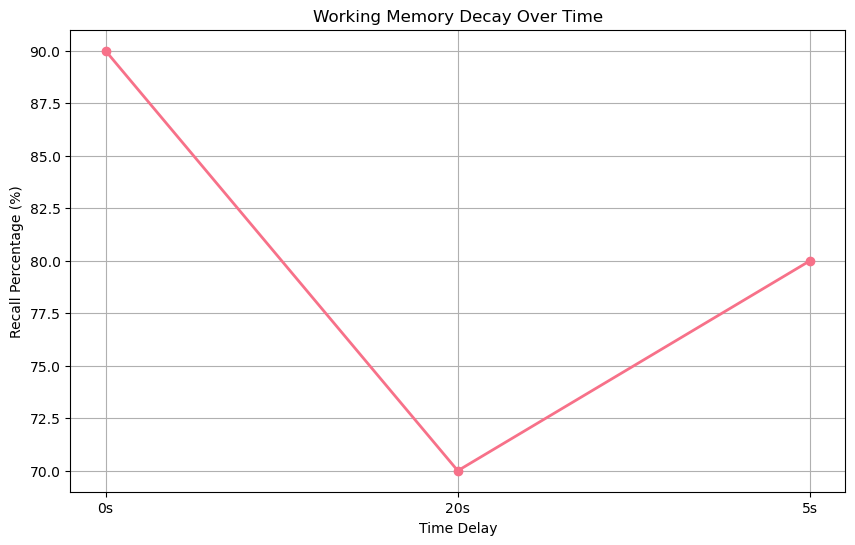

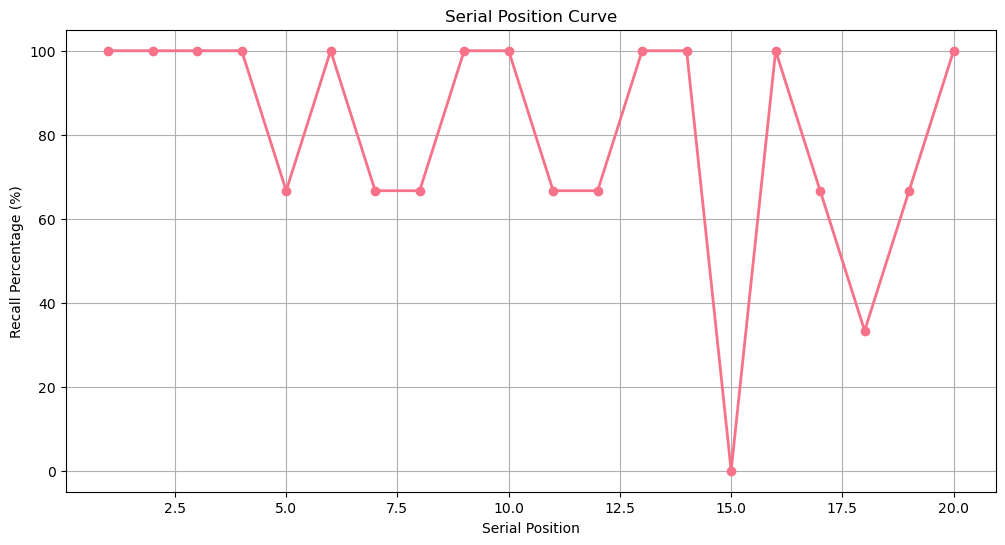

In [7]:
# Create empty DataFrame
wm_data = create_wm_dataframe()

# Add sample data (replace with your actual data)
wm_data = add_participant_data(wm_data, 'Student1', '0s', 18, [15, 18])
wm_data = add_participant_data(wm_data, 'Student1', '5s', 16, [7, 12, 15, 18])
wm_data = add_participant_data(wm_data, 'Student1', '20s', 14, [5, 8, 11, 15, 17, 19])

# Display the data
print("Working Memory Decay Data:")
display(wm_data)

# Create plots
plot_decay_curve(wm_data)
plt.show()

plot_serial_position(wm_data)
plt.show()

## Statistical Analysis

In [8]:
def analyze_results(df):
    """Perform statistical analysis on the WM decay data"""
    # Basic statistics
    print("\nSummary Statistics:")
    print(df.groupby('delay')['percentage'].describe())
    
    # Primacy effect (first 3 positions)
    primacy_positions = [1, 2, 3]
    primacy_misses = df['missed_positions'].apply(lambda x: 
        len([pos for pos in (eval(x) if isinstance(x, str) else x) if pos in primacy_positions]))
    primacy_rate = (1 - primacy_misses.sum() / (len(df) * len(primacy_positions))) * 100
    
    # Recency effect (last 3 positions)
    recency_positions = [18, 19, 20]
    recency_misses = df['missed_positions'].apply(lambda x: 
        len([pos for pos in (eval(x) if isinstance(x, str) else x) if pos in recency_positions]))
    recency_rate = (1 - recency_misses.sum() / (len(df) * len(recency_positions))) * 100
    
    print(f"\nPrimacy Effect (first 3 positions): {primacy_rate:.1f}% recall rate")
    print(f"Recency Effect (last 3 positions): {recency_rate:.1f}% recall rate")

# Run analysis
analyze_results(wm_data)


Summary Statistics:
       count  mean  std   min   25%   50%   75%   max
delay                                                
0s       1.0  90.0  NaN  90.0  90.0  90.0  90.0  90.0
20s      1.0  70.0  NaN  70.0  70.0  70.0  70.0  70.0
5s       1.0  80.0  NaN  80.0  80.0  80.0  80.0  80.0

Primacy Effect (first 3 positions): 100.0% recall rate
Recency Effect (last 3 positions): 66.7% recall rate
